In [7]:
!pip install tensorflow_decision_forests
!pip install wurlitzer

In [8]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

In [9]:

@register_line_magic
def set_cell_height(size):
  display(
      Javascript("google.colab.output.setIframeHeight(0, true, {maxHeight: " +
                 str(size) + "})"))

In [10]:
def load_dataset():
    dataset_df = pd.read_csv('/content/data/binance_delivery_futures_train.csv', index_col=0)
    dataset_df_test = pd.read_csv('/content/data/binance_delivery_futures_test.csv', index_col=0)
    label = "target"

    classes = dataset_df[label].unique().tolist()
    test_classes = dataset_df_test[label].unique().tolist()
    print(f"Label classes: {classes}")

    dataset_df[label] = dataset_df[label].map(classes.index)
    dataset_df_test[label] = dataset_df_test[label].map(classes.index)

    return dataset_df, dataset_df_test

In [11]:
def create_tfdata_pipeline(X_train, X_test, label='target'):
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, label=label)
    test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, label=label)
    return train_ds, test_ds

In [12]:
%set_cell_height 300
X_train, X_test = load_dataset()
train_ds, test_ds = create_tfdata_pipeline(X_train=X_train, X_test=X_test)
model_1 = tfdf.keras.RandomForestModel(num_trees=1000)
model_1.compile(metrics=["accuracy"])
with sys_pipes():
  model_1.fit(x=train_ds)

<IPython.core.display.Javascript object>

Label classes: [-1, 0, 1]


2021-06-24 13:16:36.476516: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-06-24 13:16:36.530643: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2299995000 Hz


248/248 [==============================] - 10s 15ms/step


[INFO kernel.cc:746] Start Yggdrasil model training
[INFO kernel.cc:747] Collect training examples
[INFO kernel.cc:392] Number of batches: 248
[INFO kernel.cc:393] Number of examples: 15826
[INFO data_spec_inference.cc:289] 15826 item(s) have been pruned (i.e. they are considered out of dictionary) for the column closing_time (0 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO kernel.cc:769] Dataset:
Number of records: 15826
Number of columns: 194

Number of columns by type:
	NUMERICAL: 192 (98.9691%)
	CATEGORICAL: 2 (1.03093%)

Columns:

NUMERICAL: 192 (98.9691%)
	0: "Close_exchange_1" NUMERICAL mean:0.315407 min:0.280078 max:0.353947 sd:0.013456
	1: "Close_exchange_2" NUMERICAL mean:0.315312 min:0.27991 max:0.35363 sd:0.0134303
	2: "FundingRate_exchange_1" NUMERICAL mean:0.000768272 min:-9.513e-05 max:1 sd:0.0263529
	3: "FundingRate_exchange_2" NUMERICAL mean:0.000934847 min:-1.929e-05 max:1 sd:0.0297279
	4: "High_exchange_1" NUMERICAL mean:0.315688 

In [13]:
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

23/23 [==============================] - 2s 22ms/step - loss: 0.0000e+00 - accuracy: 0.9236

loss: 0.0000
accuracy: 0.9236


In [14]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=5)

In [15]:
%set_cell_height 300
model_1.summary()

<IPython.core.display.Javascript object>

Model: "random_forest_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (193):
	Close_exchange_1
	Close_exchange_2
	FundingRate_exchange_1
	FundingRate_exchange_2
	High_exchange_1
	High_exchange_2
	Low_exchange_1
	Low_exchange_2
	Open_exchange_1
	Open_exchange_2
	Volume_exchange_1
	Volume_exchange_2
	arbitrage_opportunity
	arbitrage_opportunity_shift
	closing_time
	day
	higher_closing_price
	hour
	minute
	momentum_ao_exchange_1
	momentum_ao_exchange_2
	momentum_kama_exchange_1
	momentum_kama_exchange_2
	momentum_ppo_exchange_1
	momentum_ppo_exchange_2
	momentum_ppo_hist_exchange_1
	momentum_ppo_hist_exchange_2
	momentum_ppo_signal_exchange_1
	momentum_ppo_signal_exchange_2
	momentum_roc_exchange_1
	m

In [16]:
# The input features
model_1.make_inspector().features()

["Close_exchange_1" (1; #0),
 "Close_exchange_2" (1; #1),
 "FundingRate_exchange_1" (1; #2),
 "FundingRate_exchange_2" (1; #3),
 "High_exchange_1" (1; #4),
 "High_exchange_2" (1; #5),
 "Low_exchange_1" (1; #6),
 "Low_exchange_2" (1; #7),
 "Open_exchange_1" (1; #8),
 "Open_exchange_2" (1; #9),
 "Volume_exchange_1" (1; #10),
 "Volume_exchange_2" (1; #11),
 "arbitrage_opportunity" (1; #12),
 "arbitrage_opportunity_shift" (1; #13),
 "closing_time" (4; #14),
 "day" (1; #15),
 "higher_closing_price" (1; #16),
 "hour" (1; #17),
 "minute" (1; #18),
 "momentum_ao_exchange_1" (1; #19),
 "momentum_ao_exchange_2" (1; #20),
 "momentum_kama_exchange_1" (1; #21),
 "momentum_kama_exchange_2" (1; #22),
 "momentum_ppo_exchange_1" (1; #23),
 "momentum_ppo_exchange_2" (1; #24),
 "momentum_ppo_hist_exchange_1" (1; #25),
 "momentum_ppo_hist_exchange_2" (1; #26),
 "momentum_ppo_signal_exchange_1" (1; #27),
 "momentum_ppo_signal_exchange_2" (1; #28),
 "momentum_roc_exchange_1" (1; #29),
 "momentum_roc_exchang

In [17]:
# The feature importances
model_1.make_inspector().variable_importances()

{'NUM_AS_ROOT': [("arbitrage_opportunity_shift" (1; #13), 83.0),
  ("window_length_shift" (1; #191), 75.0),
  ("FundingRate_exchange_1" (1; #2), 67.0),
  ("volume_adi_exchange_2" (1; #171), 64.0),
  ("volume_adi_exchange_1" (1; #170), 61.0),
  ("pct_higher" (1; #58), 52.0),
  ("day" (1; #15), 50.0),
  ("arbitrage_opportunity" (1; #12), 49.0),
  ("FundingRate_exchange_2" (1; #3), 44.0),
  ("volatility_atr_exchange_1" (1; #128), 38.0),
  ("volatility_atr_exchange_2" (1; #129), 28.0),
  ("volatility_kcw_exchange_1" (1; #166), 26.0),
  ("higher_closing_price" (1; #16), 23.0),
  ("volatility_kcw_exchange_2" (1; #167), 23.0),
  ("trend_visual_ichimoku_b_exchange_2" (1; #121), 20.0),
  ("volatility_dcw_exchange_2" (1; #153), 20.0),
  ("volatility_dcw_exchange_1" (1; #152), 19.0),
  ("trend_visual_ichimoku_a_exchange_2" (1; #119), 19.0),
  ("volume_obv_exchange_2" (1; #183), 18.0),
  ("trend_ichimoku_b_exchange_1" (1; #82), 17.0),
  ("momentum_kama_exchange_1" (1; #21), 16.0),
  ("momentum_kam

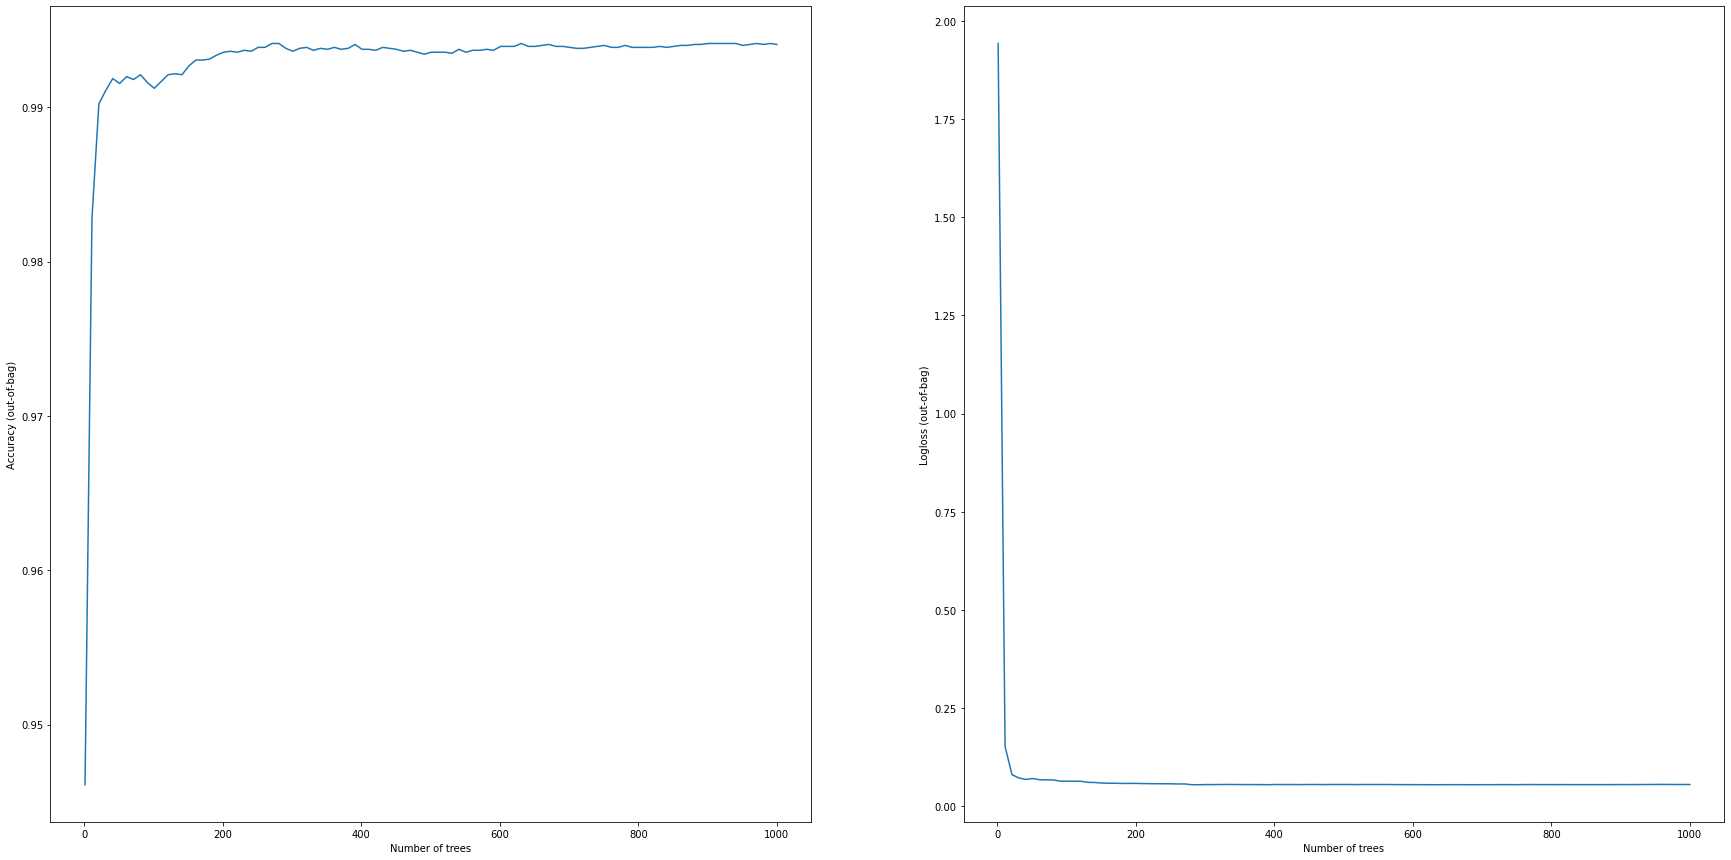

In [18]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(30, 15))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [ ]:
# calculate the model performance
preds = model_1.predict(test_ds).argmax(axis=1)
trues = X_test['target'].values
from sklearn.metrics import classification_report

report = classification_report(trues, preds, target_names=['-1', '0', '1'])
print(report)

In [19]:
model_1.save("saved_model")

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets
